----
# Laboratorium 4 - Transmitancja i charakterystyki częstotliwościowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

---- 
## 0. Zagadnienia do opanowania przed zajęciami
---- 
### 0.1. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.2. Przydatne informacje:
Funkcje z biblioteki *sympy* potrzebne do zrealizowania ćwiczenia:  
`sympy.Symbol, sympy.I, sympy.re(), sympy.im(), sympy.Abs, sympy.arg`

Dokumentacja i opisy poszczególnych funkcji *sympy*:

- https://docs.sympy.org/latest/tutorial/gotchas.html#symbols  
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html



---- 
## Transmitancje
---- 

$$ H1(s) = {{s} \over {5s + 1}} $$  
$$ H2(s) = {{2} \over {s + 3}} $$  
$$ H3(s) = {{s + 2} \over {s + 3}} $$  
$$ H4(s) = {{s + 2} \over {s + 1}} $$  
$$ H5(s) = {{2s + 3} \over {2s + 4}} $$
$$ H6(s) = {{1} \over {2s^2 + s + 1}} $$    

In [1]:
%matplotlib inline
from IPython.display import display
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)

----
## 1. Charakterystyka amplitudowa i fazowa układu - metoda analityczna
----
### Zadanie: Wyznacz i wyświetl matematyczną postać charakterystyki amplitudowej i fazowej dla układu o podanej transmitancji operatorowej.
Podpowiedź: użyj `sympy.I`, `sympy.re()`, `sympy.im()`  

In [2]:
#declare symbolic variable 'ω' (omega)
ω = sympy.Symbol('ω', real = True)
#declare symbolic variable 's'
s = 0 + sympy.I*ω

# transmitancja układów
H1=s/(5*s+1)
H2=2/(s+3)
H3=(s+2)/(s+3)
H4=(s+2)/(s+1)
H5=(2*s+3)/(2*s+4)
H6=1/(2*s**2+s+1)
H=H6
display(H)
# wyznaczenie części rzeczywistej i urojonej transmitancji
real=sympy.re(H)
imag=sympy.im(H)
print("czesc rzeczywista")
display(real)
# wyznaczenie modułu i argumentu transmitancji
modul=sympy.Abs(H)
modul1=sympy.sqrt(real**+imag**2)
xxx=modul-modul1
display(xxx.simplify())
display(modul)
display(modul1.simplify())

phase=sympy.arg(H)
display(phase)


1/(-2*ω**2 + I*ω + 1)

czesc rzeczywista


(1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2)

-sqrt((-2*ω**2/(ω**2 + (2*ω**2 - 1)**2) + 1/(ω**2 + (2*ω**2 - 1)**2))**(ω**2/(ω**2 + (2*ω**2 - 1)**2)**2)) + 1/sqrt(4*ω**4 - 3*ω**2 + 1)

1/sqrt(4*ω**4 - 3*ω**2 + 1)

sqrt(((1 - 2*ω**2)/(ω**2 + (2*ω**2 - 1)**2))**(ω**2/(ω**2 + (2*ω**2 - 1)**2)**2))

arg(1/(-2*ω**2 + I*ω + 1))

----
## 2. Charakterystyka amplitudowa i fazowa układu - metoda analityczna - wykres
----
### Zadanie: Sporządzić wykresy wyznaczonych wcześniej charakterystyk amplitudowej i fazowej
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.logspace`, `sympy.lambdify`, `matplotlib.axes.Axes.loglog`, `matplotlib.axes.Axes.semilogx`

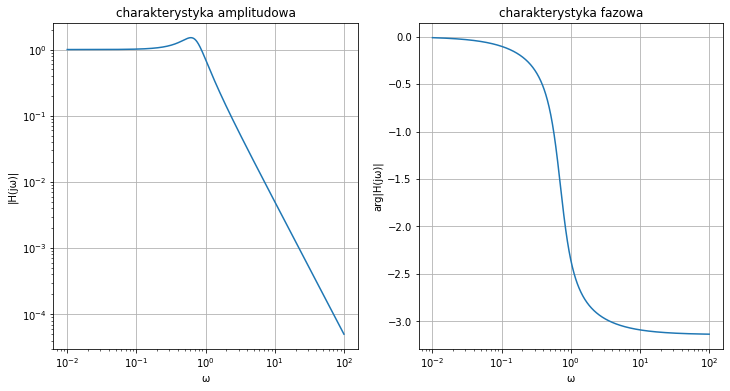

In [3]:
#wykres charakterystyki amplitudowej i charakterystyki fazowej
w1=np.logspace(-2,2,1000)
Mod=sympy.lambdify(ω,modul,'numpy')(w1)
Phas=sympy.lambdify(ω,phase,'numpy')(w1)
fig,axs=plt.subplots(1,2,figsize=default_figsize)

axs[0].loglog(w1, Mod)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w1, Phas)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("arg|H(jω)|")
axs[1].grid()

----
## 3. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
----
### Zadanie: Sporządzić wykresy charakterystyk amplitudowej i fazowej korzystając jedynie z biblioteki `numpy`
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: $ H(s) = {{B(s)} \over {A(s)}} $
Podpowiedź: wylicz niezależnie wartości dla licznika i mianownika transmitancji  
Podpowiedź: użyj `numpy.logspace`, `numpy.poly1d`, `numpy.abs`, `numpy.angle`, `1j`

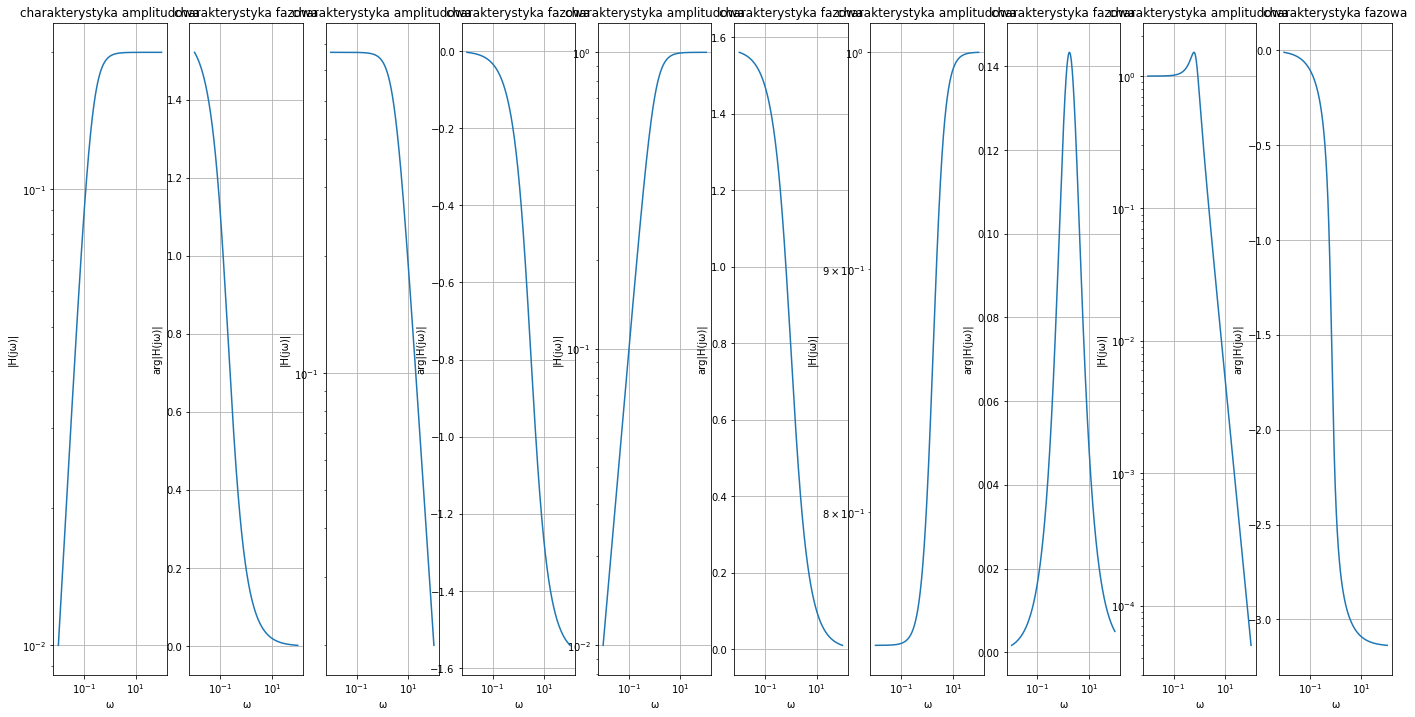

In [43]:
#kolejny wykres charakterystyki amplitudowej i fazowej
w1=np.logspace(-2,2,1000)
s = 1j*w1

H1l=np.poly1d([1, 0])
H1m=np.poly1d([5, 1])

H2l=np.poly1d([2])
H2m=np.poly1d([1, 3])

H3l=np.poly1d([1, 2])
H3m=np.poly1d([1, 3])

H3l=np.poly1d([1, 0])
H3m=np.poly1d([1, 1])

H4l=np.poly1d([2, 3])
H4m=np.poly1d([2, 4])

H5l=np.poly1d([1])
H5m=np.poly1d([2, 1, 1])

A1=np.polyval(H1l, s)
B1=np.polyval(H1m, s)
H1=A1/B1

A2=np.polyval(H2l, s)
B2=np.polyval(H2m, s)
H2=A2/B2

A3=np.polyval(H3l, s)
B3=np.polyval(H3m, s)
H3=A3/B3

A4=np.polyval(H4l, s)
B4=np.polyval(H4m, s)
H4=A4/B4

A5=np.polyval(H5l, s)
B5=np.polyval(H5m, s)
H5=A5/B5

default_figsize=(24,12)

fig,axs=plt.subplots(1,10,figsize=default_figsize)

axs[0].loglog(w1, np.abs(H1))
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w1, np.angle(H1))
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("arg|H(jω)|")
axs[1].grid()


axs[2].loglog(w1, np.abs(H2))
axs[2].set_title("charakterystyka amplitudowa")
axs[2].set_xlabel("ω")
axs[2].set_ylabel("|H(jω)|")
axs[2].grid()

axs[3].semilogx(w1, np.angle(H2))
axs[3].set_title("charakterystyka fazowa")
axs[3].set_xlabel("ω")
axs[3].set_ylabel("arg|H(jω)|")
axs[3].grid()


axs[4].loglog(w1, np.abs(H3))
axs[4].set_title("charakterystyka amplitudowa")
axs[4].set_xlabel("ω")
axs[4].set_ylabel("|H(jω)|")
axs[4].grid()

axs[5].semilogx(w1, np.angle(H3))
axs[5].set_title("charakterystyka fazowa")
axs[5].set_xlabel("ω")
axs[5].set_ylabel("arg|H(jω)|")
axs[5].grid()


axs[6].loglog(w1, np.abs(H4))
axs[6].set_title("charakterystyka amplitudowa")
axs[6].set_xlabel("ω")
axs[6].set_ylabel("|H(jω)|")
axs[6].grid()

axs[7].semilogx(w1, np.angle(H4))
axs[7].set_title("charakterystyka fazowa")
axs[7].set_xlabel("ω")
axs[7].set_ylabel("arg|H(jω)|")
axs[7].grid()


axs[8].loglog(w1, np.abs(H5))
axs[8].set_title("charakterystyka amplitudowa")
axs[8].set_xlabel("ω")
axs[8].set_ylabel("|H(jω)|")
axs[8].grid()

axs[9].semilogx(w1, np.angle(H5))
axs[9].set_title("charakterystyka fazowa")
axs[9].set_xlabel("ω")
axs[9].set_ylabel("arg|H(jω)|")
axs[9].grid()

----
## 4. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna z użyciem funkcji `freqs` z biblioteki `scipy`
----
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj funkcji `scipy.signal.freqs` do wyliczenia wartości transmitancji. 

In [30]:
#jeszcze jeden wykres charakterystyki amplitudowej i fazowej
from scipy.signal import freqs, iirfilter
H=freqs(np.polyval(H1l, s),np.polyval(H1m, s),np.logspace(-2,2,1000))


C:\Users\shrap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
C:\Users\shrap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
C:\Users\shrap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\signal\filter_design.py:189: RuntimeWarning: invalid value encountered in true_divide
  h = polyval(b, s) / polyval(a, s)


---- 
## 5. Charakterystyka amplitudowo-fazowa układu
---- 
### Zadanie: Wyznacz część rzeczywistą oraz część urojoną transmitancji układu. Sporządzić wykres charakterystyki amplitudowo-fazowej dla układu o zadanej transmitancji.
Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.real()`, `numpy.imag()`

C:\Users\shrap\AppData\Local\Temp/ipykernel_20096/2385675353.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


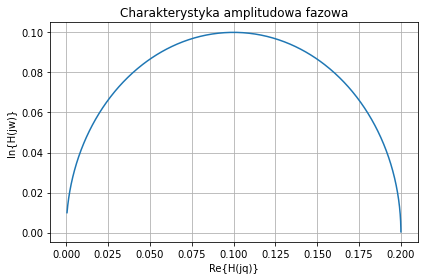

In [47]:
#dla odmiany wykres charakterystyki amplitudowo-fazowej
w1=np.logspace(-2,2,1000)
B=np.poly1d([1,0])
A=np.poly1d([5,1])
s = 1j*w1
H=B(s)/A(s)
R=np.real(H)
I=np.imag(H)

fig, ax=plt.subplots(1, 1)
ax.plot(R, I)
ax.set_title("Charakterystyka amplitudowa fazowa")
ax.set_xlabel("Re{H(jq)}")
ax.set_ylabel("In{H(jw)}")
ax.grid()
fig.tight_layout()
fig.show()
